<a href="https://colab.research.google.com/github/orus-kade/Python_experiments/blob/master/exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read and unzip data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = '/content/drive/My Drive/Тёма руникс'
zip_path = base_dir + '/leaf_diseases.zip'
unzip_path = base_dir + '/dataset'
import numpy as np

from tensorflow.random import set_seed
import random

seed = 42
np.random.seed(seed)
set_seed(seed)
random.seed(seed)



# !mkdir '$unzip_path'
# !unzip -d '$unzip_path' '$zip_path'

# Plotting class distribution histogram

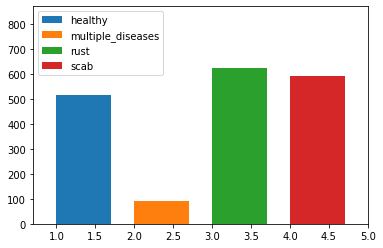

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

leafs = pd.read_csv(unzip_path+'/plant-pathology-2020-fgvc7/train.csv') 
y = np.array(leafs.drop(["image_id"], axis=1).values)

num_healthy = sum(y[:,0])
num_multiple_diseases = sum(y[:,1])
num_rust = sum(y[:,2])
num_scab = sum(y[:,3])

plt.hist([1]*num_healthy,bins=4, label = "healthy", width = 0.7)
plt.hist([2]*num_multiple_diseases,bins=4, label = "multiple_diseases", width = 0.7)
plt.hist([3]*num_rust,bins=4, label = "rust", width = 0.7)
plt.hist([4]*num_scab,bins=4, label = "scab", width = 0.7)
plt.ylim(0,max(num_healthy,num_multiple_diseases,num_rust, num_scab)*1.4)
plt.xlim(0.7,5)
plt.legend(loc='best')

# Splitting data

## Creating directories for train, test, validation

In [0]:
import os

splitted_dataset_path = base_dir + '/splitted_dataset'
# os.mkdir(splitted_dataset_path)

train_dir = os.path.join(splitted_dataset_path, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(splitted_dataset_path, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(splitted_dataset_path, 'test')
# os.mkdir(test_dir)

for path in [train_dir, test_dir, validation_dir]:
  for num_class in [0,1,2,3]:
    class_dir = os.path.join(path, str(num_class) + '_class')
    # os.mkdir(class_dir)

## Search image indexes for each class

In [0]:
indices_class_0, indices_class_1, indices_class_2, indices_class_3 = [], [], [], []
for i in range(0, len(y),1):
  if(np.argmax(y[i]) == 0):
    indices_class_0.append(i)
  elif(np.argmax(y[i]) == 1):
    indices_class_1.append(i)
  elif(np.argmax(y[i]) == 2):
    indices_class_2.append(i)
  elif(np.argmax(y[i]) == 3):
    indices_class_3.append(i)

## Shuffling Index Arrays

In [0]:
import random

random.shuffle(indices_class_0)
random.shuffle(indices_class_1)
random.shuffle(indices_class_2)
random.shuffle(indices_class_3)

indices_classes = [indices_class_0, indices_class_1, indices_class_2, indices_class_3]

## Calculation num of elements in test, train and validation samples

In [8]:
import pandas as pd

percent_validation = 10
percent_test = 10

num_test = []
num_validation = []
num_train = []
for i in range(0,4,1):
  num_test.append(int(len(indices_classes[i])*percent_test/100))
  num_validation.append(int(len(indices_classes[i])*percent_validation/100))
  num_train.append(len(indices_classes[i])-num_test[-1] - num_validation[-1])

array_for_pandas = np.transpose([num_train, num_validation, num_test])

df = pd.DataFrame({
     '': ['Train', 'Validation', 'Test'],
     'Class 0': array_for_pandas[0,:],
     'Class 1': array_for_pandas[1,:],
     'Class 2': array_for_pandas[2,:],
     'Class 3': array_for_pandas[3,:]
 })

df

,,Class 0,Class 1,Class 2,Class 3
0,Train,414,73,498,474
1,Validation,51,9,62,59
2,Test,51,9,62,59


## Writing data with train, test and validation samples

In [0]:
import shutil

src = unzip_path + '/plant-pathology-2020-fgvc7/images'

# For test images
for num_class in [0,1,2,3]:
  test_fnames = ['Train_{}.jpg'.format(i) for i in indices_classes[num_class][0:num_test[num_class]]]
  for fname in test_fnames:
    shutil.copyfile(src+'/'+fname, test_dir+'/'+str(num_class)+'_class'+'/'+fname)

# For validation images 
for num_class in [0,1,2,3]:
  validation_fnames = ['Train_{}.jpg'.format(i) for i in indices_classes[num_class][num_test[num_class]:num_test[num_class] + num_validation[num_class]]]
  for fname in validation_fnames:
    shutil.copyfile(src+'/'+fname, validation_dir+'/'+str(num_class)+'_class'+'/'+fname)

# For train images
for num_class in [0,1,2,3]:
  train_fnames = ['Train_{}.jpg'.format(i) for i in indices_classes[num_class][num_test[num_class] + num_validation[num_class]:]]
  for fname in train_fnames:
    shutil.copyfile(src+'/'+fname, train_dir+'/'+str(num_class)+'_class'+'/'+fname)

In [0]:
!cp -r '/content/drive/My Drive/Тёма руникс/splitted_dataset' '/content/data'

In [0]:
train_dir = '/content/data/splitted_dataset/train'
test_dir = '/content/data/splitted_dataset/test'
validation_dir = '/content/data/splitted_dataset/validation'

# Сверточная нейронная сеть

In [60]:
from keras import layers
from keras import models
from keras.layers import Dropout

dropout = 0.0

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(dropout))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(dropout))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(dropout))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(dropout))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten()) # Сворачиваем до одномерного
model.add(Dropout(dropout))

model.add(layers.Dense(512, activation='relu')) # Добавляем полносвязный слой
model.add(layers.Dense(4, activation='softmax')) # Добавляем softmax с 4 выходами (т.к. 4 класса)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 64)      

# Подготовка данных

In [62]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
                                   
                                  #  , horizontal_flip=True, vertical_flip=True, rotation_range=10)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

train_generator = train_datagen.flow_from_directory( 
        train_dir,
        # color_mode = 'grayscale',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        # color_mode = 'grayscale',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
        test_dir,
        # color_mode = 'grayscale',
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='categorical')

Found 1459 images belonging to 4 classes.
Found 181 images belonging to 4 classes.
Found 181 images belonging to 4 classes.


In [0]:
imgs,labels=train_generator.next()
print(imgs.shape, labels.shape)

(32, 150, 150, 3) (32, 4)


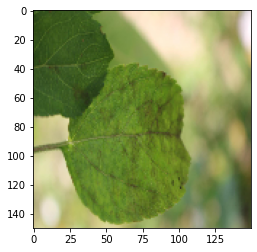

In [0]:
plt.imshow(imgs[0])
plt.title(labels)

In [0]:
len(train_generator)

46

In [0]:
1459 / 32


5.65625

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator = train_generator, 
                              steps_per_epoch = sum(num_train)//batch_size, 
                              epochs = 25, 
                              validation_data = validation_generator, 
                              validation_steps = sum(num_validation)//batch_size)

Epoch 1/25
11/11 [==============================] - 47s 4s/step - loss: 1.3125 - accuracy: 0.3111 - val_loss: 1.2644 - val_accuracy: 0.3047
Epoch 2/25
11/11 [==============================] - 38s 3s/step - loss: 1.2631 - accuracy: 0.3238 - val_loss: 1.2200 - val_accuracy: 0.3774
Epoch 3/25
11/11 [==============================] - 44s 4s/step - loss: 1.2343 - accuracy: 0.3313 - val_loss: 1.2723 - val_accuracy: 0.3438
Epoch 4/25
11/11 [==============================] - 40s 4s/step - loss: 1.2371 - accuracy: 0.3546 - val_loss: 1.1185 - val_accuracy: 0.3396
Epoch 5/25
11/11 [==============================] - 47s 4s/step - loss: 1.2287 - accuracy: 0.3700 - val_loss: 1.1997 - val_accuracy: 0.4766
Epoch 6/25
11/11 [==============================] - 38s 3s/step - loss: 1.1872 - accuracy: 0.4195 - val_loss: 1.2303 - val_accuracy: 0.3774
Epoch 7/25
11/11 [==============================] - 47s 4s/step - loss: 1.1834 - accuracy: 0.4368 - val_loss: 1.1726 - val_accuracy: 0.4688
Epoch 8/25
11/11 [==

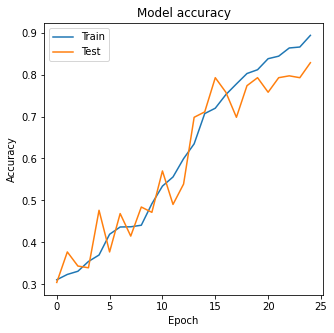

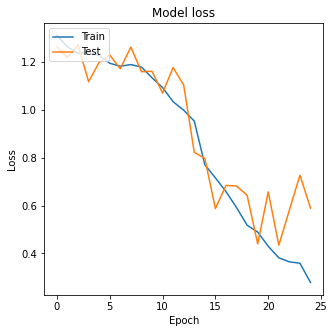

In [65]:
import matplotlib.pyplot as plt

history_old = history

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [0]:
from keras.models import Model

num_in_row = 8
# ixs = [0, 3, 6]
# outputs= [model.layers[i].output for i in ixs]

# conv_layers = []
names = []
outputs = []

for layer in model.layers:
  if 'conv' in layer.name:
    # conv_layers.append(layer)
    outputs.append(layer.output)
    names.append(layer.name)
    
# outputs= [x.output for x in conv_layers]    

model2 = Model(inputs=model.inputs, outputs=outputs)

imgs,labels=test_generator.next()
img = imgs[:1]

feature_maps = model2.predict(img)
for feature_map, l_name in zip(feature_maps, names):
  print(l_name)
  fmap = np.transpose(feature_map[0], axes = [2,1,0])
  fix,axes = plt.subplots(int(len(fmap)/8), 8, figsize=(32, 4*int(len(fmap)/8)), subplot_kw={'xticks':(),'yticks':()})
  for image, ax in zip(fmap, axes.ravel()):
      ax.imshow(image)


In [0]:
from keras.models import Model

num_in_row = 8
# ixs = [0, 3, 6]

names = []
outputs = []

for layer in model.layers:
  if 'conv' in layer.name:
    # conv_layers.append(layer)
    outputs.append(layer.output)
    names.append(layer.name)

 

# outputs= [model.layers[i].output for i in ixs]
model2 = Model(inputs=model.inputs, outputs=outputs)

imgs,labels=test_generator.next()
img = imgs[:1]

feature_maps = model2.predict(img)


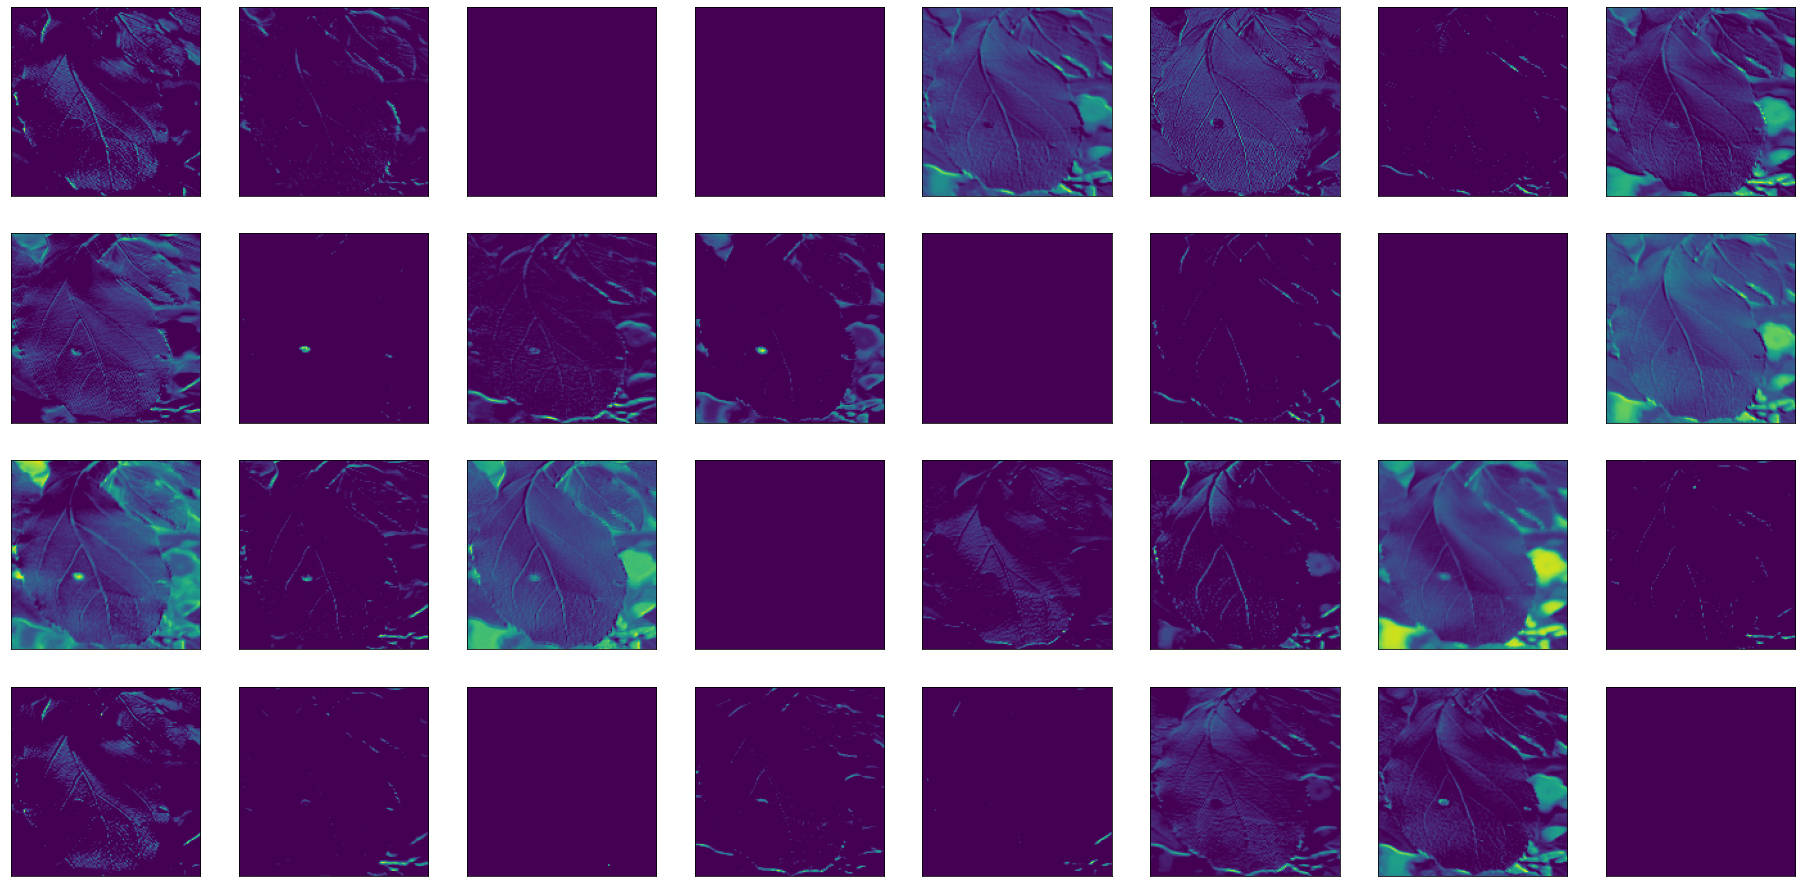

In [67]:
fmap = np.transpose(feature_maps[0][0], axes = [2,1,0])
fix,axes = plt.subplots(int(len(fmap)/8), 8, figsize=(32, 4*int(len(fmap)/8)), subplot_kw={'xticks':(),'yticks':()})
for image, ax in zip(fmap, axes.ravel()):
    ax.imshow(image)

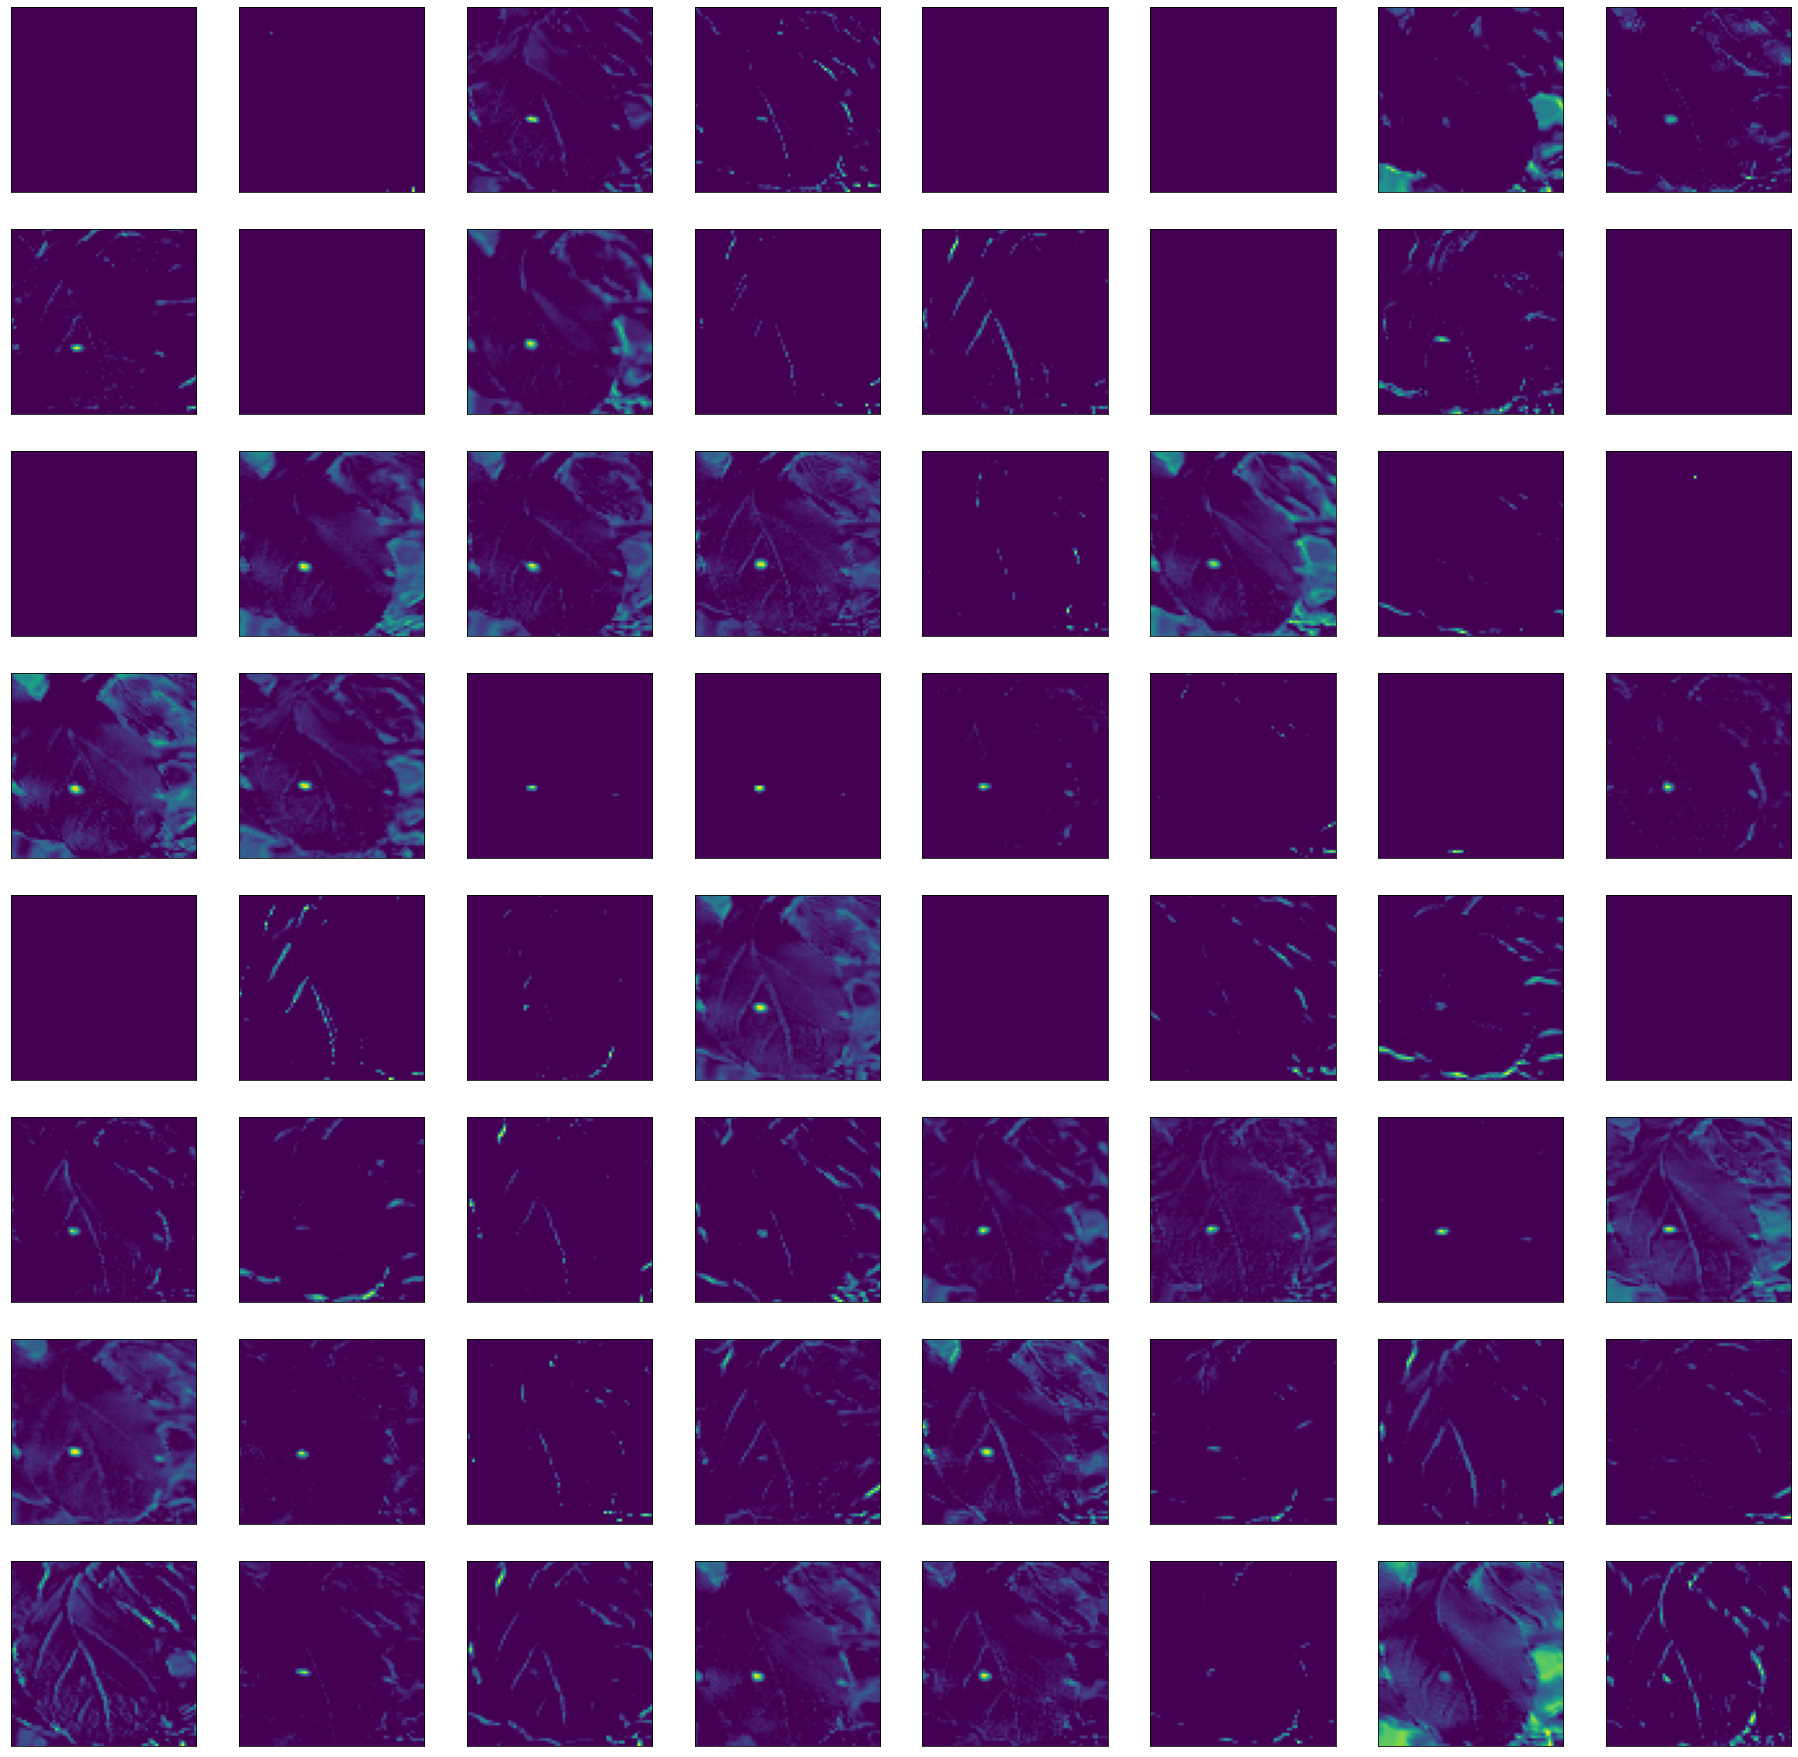

In [68]:
fmap = np.transpose(feature_maps[1][0], axes = [2,1,0])
fix,axes = plt.subplots(int(len(fmap)/8), 8, figsize=(32, 4*int(len(fmap)/8)), subplot_kw={'xticks':(),'yticks':()})
for image, ax in zip(fmap, axes.ravel()):
    ax.imshow(image)

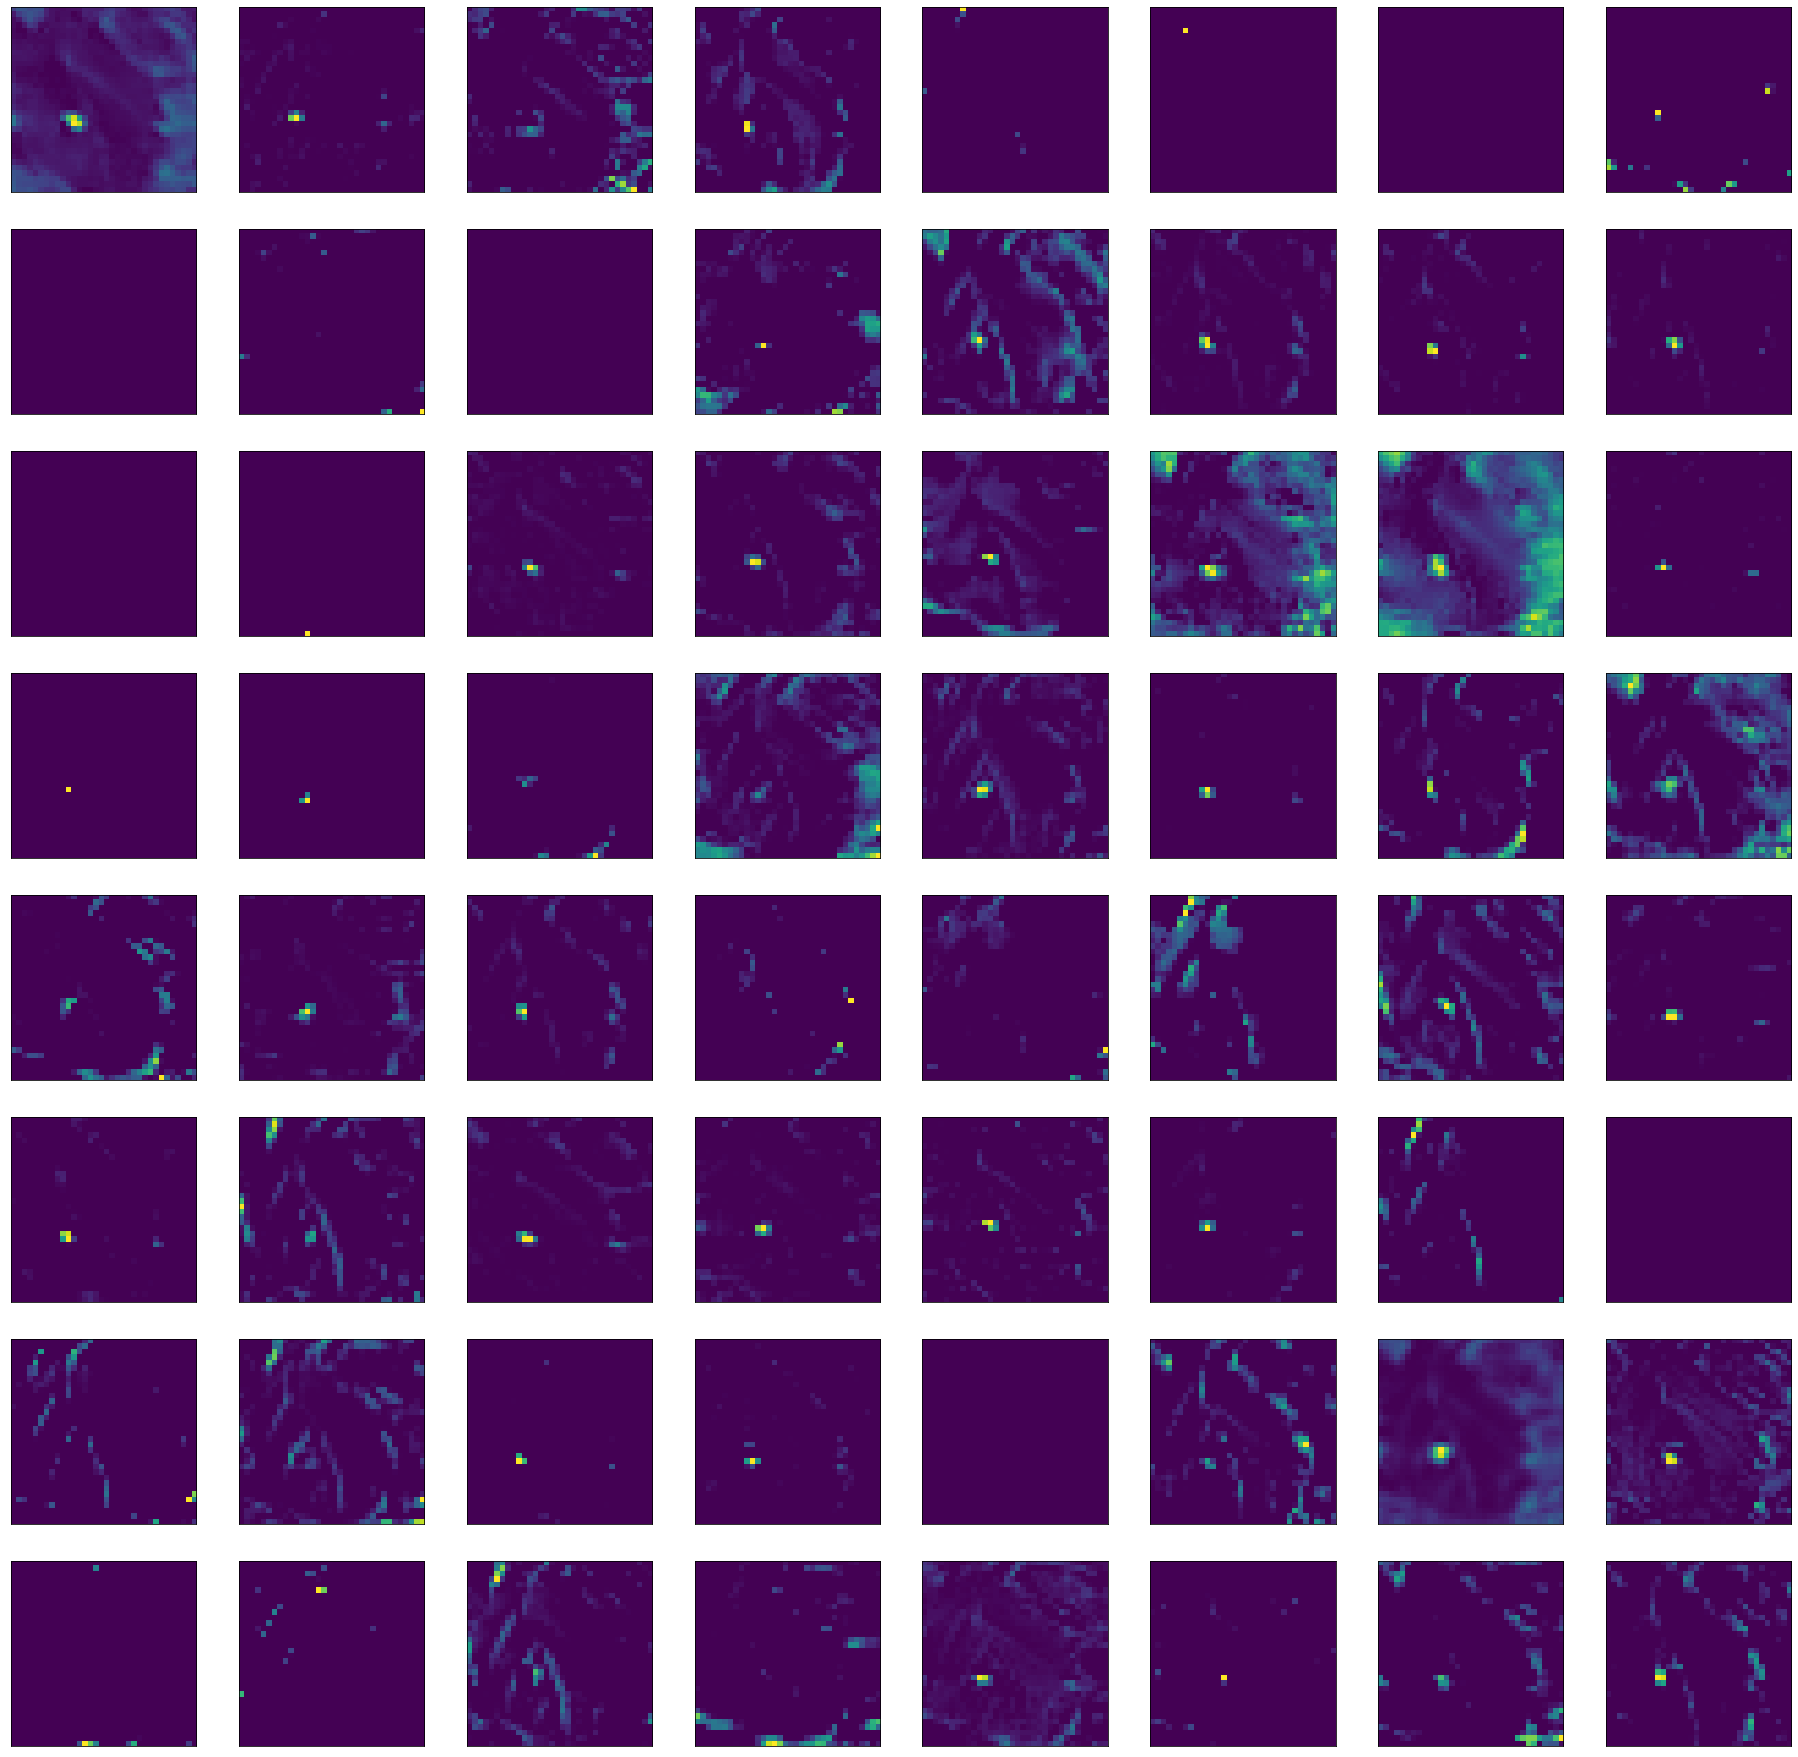

In [69]:
fmap = np.transpose(feature_maps[2][0], axes = [2,1,0])
fix,axes = plt.subplots(int(len(fmap)/8), 8, figsize=(32, 4*int(len(fmap)/8)), subplot_kw={'xticks':(),'yticks':()})
for image, ax in zip(fmap, axes.ravel()):
    ax.imshow(image)

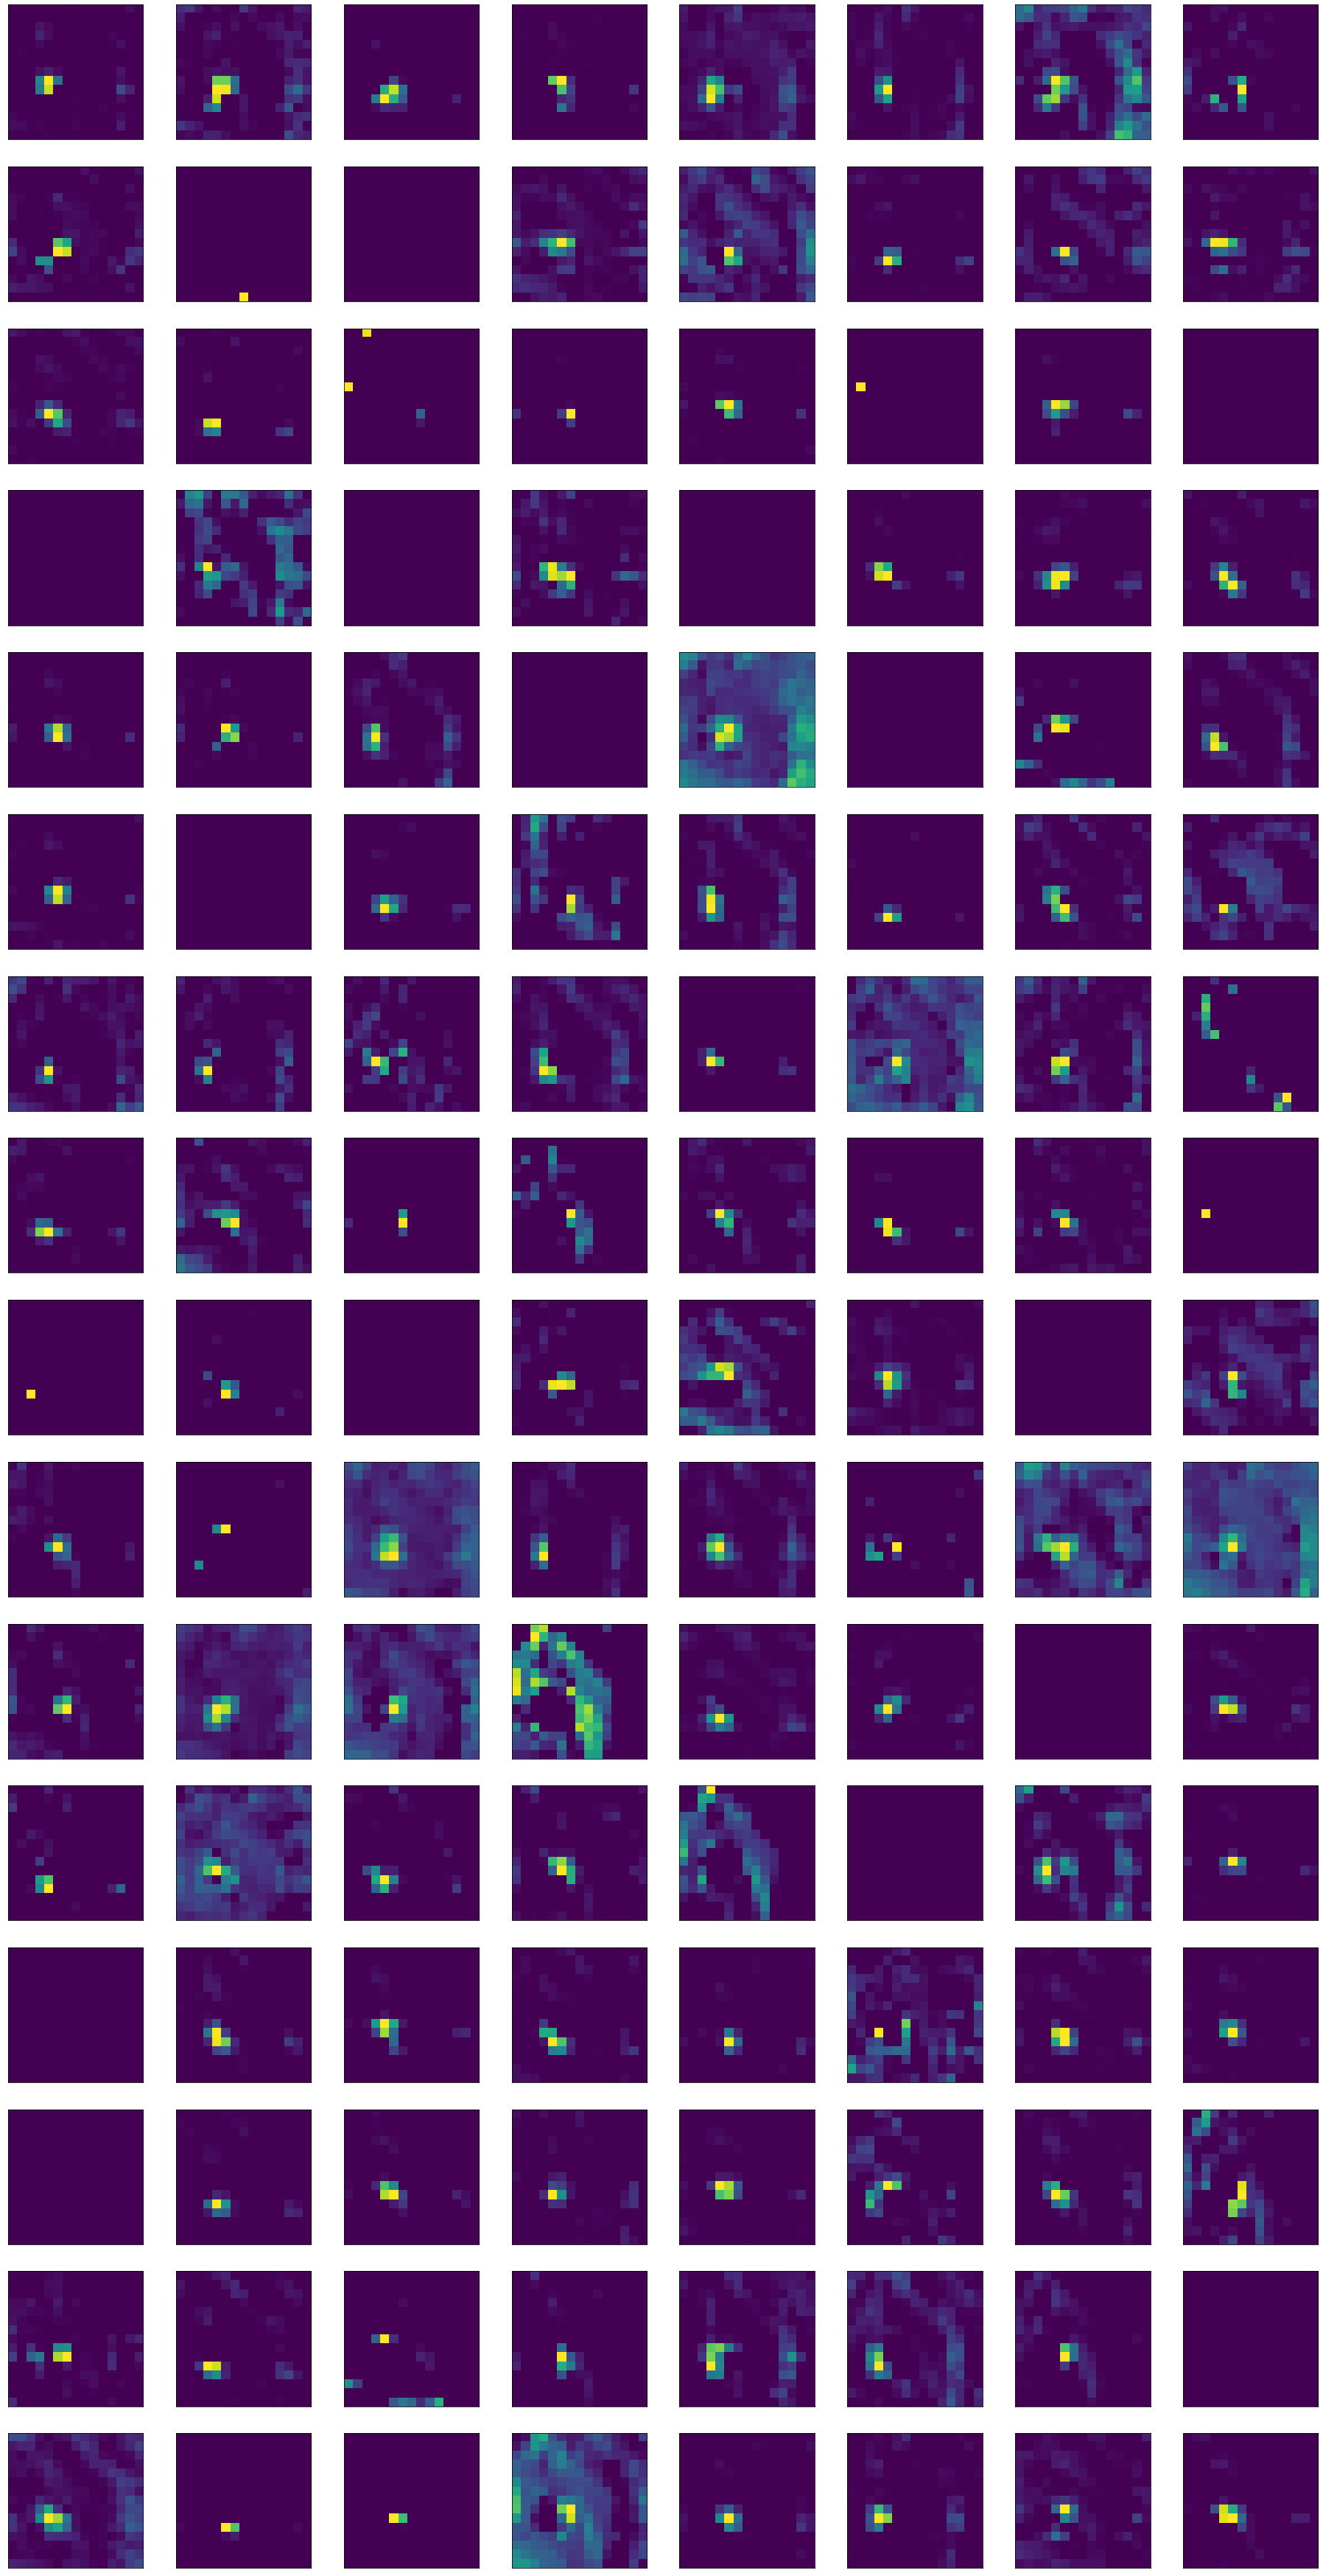

In [70]:
fmap = np.transpose(feature_maps[3][0], axes = [2,1,0])
fix,axes = plt.subplots(int(len(fmap)/8), 8, figsize=(32, 4*int(len(fmap)/8)), subplot_kw={'xticks':(),'yticks':()})
for image, ax in zip(fmap, axes.ravel()):
    ax.imshow(image)

In [72]:
preds = np.array([])
y_true = np.array([])

from sklearn.metrics import classification_report

for _ in range(len(test_generator)):
  images, labels = test_generator.next()
  pred = model.predict(images)
  preds = np.concatenate((preds, np.argmax(pred, axis=1)))  
  y_true = np.concatenate((y_true, np.argmax(labels, axis=1)))

print(classification_report(y_true, preds, target_names = ['cl1', 'cl2', 'cl3', 'cl4']))  

# получить на данные loss и accuracy
results = model.evaluate(test_generator)
print(results)
print('acc -> {}'.format(results[1]))

              precision    recall  f1-score   support

         cl1       0.70      0.82      0.75        56
         cl2       0.33      0.09      0.14        11
         cl3       0.84      0.94      0.89        52
         cl4       0.81      0.71      0.76        62

    accuracy                           0.77       181
   macro avg       0.67      0.64      0.64       181
weighted avg       0.76      0.77      0.76       181

2/2 [==============================] - 6s 3s/step
[0.6245477199554443, 0.7955800890922546]
acc -> 0.7955800890922546


In [51]:
model.evaluate(test_generator)

2/2 [==============================] - 5s 3s/step


[0.9879546761512756, 0.6519337296485901]

In [0]:
a = np.array([[1,2],[-4,5]])
print(np.max(a))

5


In [0]:
print(history.model.evaluate(validation_generator))
print(max(history.history['val_accuracy']))
print(history.history['val_accuracy'][-1])
print(min(history.history['val_loss']))
print(history.history['val_loss'][-1])

2/2 [==============================] - 6s 3s/step
[1.089612603187561, 0.4806629717350006]
0.5199999809265137
0.44999998807907104
1.0936079025268555
1.2720674276351929


In [0]:

# summarize filter shapes
for layer in model.layers:
	if 'conv' in layer.name:
		print(layer.name)
  
print(model.layers[0].name)

conv2d_31
